In [ ]:
"""
Indices:
    * Indices are in the format (lattice, row, column).
    * Qubit sites (i.e. edges) are indexed with lattice=0 and lattice=1 indicating horizontal and vertical edges,
      respectively, on the primal lattice.
    For example, site indices on a 3 x 3 toric lattice (primal lattice edges shown):
    ::
         --|----(0,0,0)----|----(0,0,1)----|----(0,0,2)--
           |               |               |
        (1,0,0)         (1,0,1)         (1,0,2)
           |               |               |
         --|----(0,1,0)----|----(0,1,1)----|----(0,1,2)--
           |               |               |
        (1,1,0)         (1,1,1)         (1,1,2)
           |               |               |
         --|----(0,2,0)----|----(0,2,1)----|----(0,2,2)--
           |               |               |
        (1,2,0)         (1,2,1)         (1,2,2)
           |               |               |
    * Stabilizer plaquettes are indexed by their northern edge with lattice=0 indicating plaquettes on the primal
      lattice, and lattice=1 indicating plaquettes on the dual lattice.
      (Equivalently, vertices are indicated by their northern edge with lattice=0 indicating vertices on the dual
      lattice, and lattice=1 indicating vertices on the primal lattice.)
    For example, plaquette indices on the primal 3 x 3 lattice (primal lattice edges shown):
    ::
         --|---------------|---------------|-------------
           |               |               |
           |    (0,0,0)    |    (0,0,1)    |    (0,0,2)
           |               |               |
         --|---------------|---------------|-------------
           |               |               |
           |    (0,1,0)    |    (0,1,1)    |    (0,1,2)
           |               |               |
         --|---------------|---------------|-------------
           |               |               |
           |    (0,2,0)    |    (0,2,1)    |    (0,2,2)
           |               |               |
    For example, plaquette indices on the dual 3 x 3 lattice (dual lattice edges shown):
    ::
        (1,2,0)    :    (1,2,1)    :    (1,2,2)    :
                   :               :               :
         - - - - - : - - - - - - - : - - - - - - - : - -
                   :               :               :
        (1,0,0)    :    (1,0,1)    :    (1,0,2)    :
                   :               :               :
         - - - - - : - - - - - - - : - - - - - - - : - -
                   :               :               :
        (1,1,0)    :    (1,1,1)    :    (1,1,2)    :
                   :               :               :
         - - - - - : - - - - - - - : - - - - - - - : - -
                   :               :               :
    """
    

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from qecsim.graphtools import blossom5


In [434]:
def recovery(x1,y1,x2,y2):
    if y2<y1:
        x1, x2 = x2, x1
        y1, y2 = y2, y1

    dx = np.abs(x1-x2)
    dy = np.abs(y1-y2)
    dl = min(dx,c-dx)+min(dy,r-dy)
    if dy > r-dy:
        if dx > c-dx:
            if x1<x2:
                v1x = np.arange(x1,x2-c-1,-1) %c 
                v1y = [y1]*len(v1x)
                p1x = np.arange(x1,x2-c,-1)%c
                p1y = [y1+0.5]*len(p1x)
                v2y = np.arange(y1-1,y2-r-1,-1) %r
                p2y = np.arange(y1,y2-r,-1)%r
            else:
                v1x = np.arange(x2,x1-c-1,-1) %c 
                v1y = [y2]*len(v1x)
                p1x = np.arange(x2,x1-c,-1)%c
                p1y = [y2+0.5]*len(p1x)                
                v2y = np.arange(y2+1,y1+r+1) %r
                p2y = np.arange(y2+1,y1+r+1)%r
            v2x = [max(x1,x2)]*len(v2y)
            p2x = [max(x1,x2)+0.5]*len(p2y)
        else:
            if x1<x2:
                v1x = np.arange(x1,x2+1)
                v1y = [y1]*len(v1x)
                p1x = np.arange(x1+1,x2+1)
                p1y = [y1+0.5]*len(p1x)
                v2y = np.arange(y1-1,y2-r-1,-1) %r
                p2y = np.arange(y1,y2-r,-1) %r
            elif x1==x2:
                v2y = np.arange(y1,y2-r-1,-1) %r
                p2y = np.arange(y1,y2-r,-1) %r
            else:
                v1x = np.arange(x2,x1+1)
                v1y = [y2]*len(v1x)
                p1x = np.arange(x2+1,x1+1)
                p1y = [y2+0.5]*len(p1x)
                v2y = np.arange(y2+1,y1+r+1) %r
                p2y = np.arange(y2+1,y1+r+1) %r
            v2x = [max(x1,x2)]*len(v2y)
            p2x = [max(x1,x2)+0.5]*len(p2y)
            
        if dx == 0:
            vx = np.array(v2x)
            vy = np.array(v2y)
            px = np.array(p2x)
            py = np.array(p2y)
        else:
            vx = np.concatenate((v1x,v2x))
            vy = np.concatenate((v1y,v2y))
            px = np.concatenate((p1x,p2x))
            py = np.concatenate((p1y,p2y))
            
    else:
        if dx > c-dx:
            if dy>0:
                if x1<x2:
                    v1x = np.arange(x1,x2-c-1,-1)%c
                    v1y = [y1]*len(v1x)
                    p1x = np.arange(x1,x2-c,-1)%c
                    p1y = [y1+0.5]*len(p1x)
                    v2y = np.arange(y1+1,y2+1)
                    p2y = np.arange(y1+1,y2+1)
                else:
                    v1x = np.arange(x2,x1-c-1,-1)%c
                    v1y = [y2]*len(v1x)
                    p1x = np.arange(x2,x1-c,-1)%c
                    p1y = [y2+0.5]*len(p1x)
                    v2y = np.arange(y2-1,y1-1,-1)
                    p2y = np.arange(y2,y1,-1)
                v2x = [max(x1,x2)]*len(v2y)
                p2x = [max(x1,x2)+0.5]*len(p2y)
                
                vx = np.concatenate((v1x,v2x))
                vy = np.concatenate((v1y,v2y))
                px = np.concatenate((p1x,p2x))
                py = np.concatenate((p1y,p2y))
            else:
                vx = np.arange(min(x1,x2),max(x1,x2)-c-1,-1)%c
                vy = np.array([y1]*len(vx))
                px = np.arange(min(x1,x2),max(x1,x2)-c,-1)%c
                py = np.array([y1+0.5]*len(px))
                
        else:
            if x1<x2:
                v1x = np.arange(x1,x2+1)
                v1y = [y1]*len(v1x)
                v2y = np.arange(y1+1,y2+1)
                v2x = [max(x1,x2)]*len(v2y)
            elif x1==x2:
                v2y = np.arange(y1,y2+1)
                v2x = [max(x1,x2)]*len(v2y)
            else:
                v1x = np.arange(x2,x1+1)
                v1y = [y2]*len(v1x)
                v2y = np.arange(y2-1,y1-1,-1)
                v2x = [max(x1,x2)]*len(v2y)
                
            if dy ==0:
                vx = np.array(v1x)
                vy = np.array(v1y)
            elif dx == 0:
                vx = np.array(v2x)
                vy = np.array(v2y)
            else:
                vx = np.concatenate((v1x,v2x))
                vy = np.concatenate((v1y,v2y))

            px = (vx[0:len(vx)-1]+vx[1:])/2 + 0.5
            py = (vy[0:len(vy)-1]+vy[1:])/2 + 0.5


#     if qubit == "qubits":
    
    return vx, vy, px, py

## Error threshold calculation

In [502]:


Nrep = 1000 # number of iterations
L_list = [3,5,7,9]
px_list = np.linspace(0.001,0.3,20)
fail_prob = np.zeros((len(L_list),len(px_list)))

for i_L, r in enumerate(L_list):
    print("L= ", r)
    l = 2 # number of sublattice points (2 for toric code) or primal/dual
#     r = 5 # number of columns
    c = r # number of rows
    Λ = np.kron([[0,1],[1,0]],np.eye(l*r*c))

    # plaquette stabilzers
    Sz = np.zeros((r*c,l*r*c))
    for row in range(r):
        for col in range(c):
            Sz[row*c + col, 2*(row*c+col)] = 1
            Sz[row*c + col, 2*(row*c+col)+1] = 1
            Sz[row*c + col, 2*(row*c+((col+1)%c))+1] = 1
            Sz[row*c + col, 2*(((row+1)%r)*c+col)] = 1
    Sz = np.concatenate((np.zeros((r*c,l*r*c)),Sz),axis=1)
    # print(Sz.T)

    logicals = np.zeros((4,2*l*r*c))
    ## x ops
    logicals[0,1:2*c+1:2] = np.ones(c) 
    logicals[1,0:l*r*c:2*c] = np.ones(c) 
    ## z ops
    logicals[2,l*r*c:(l*r*c+2*c):2] = np.ones(c) 
    logicals[3,l*r*c+1:2*l*r*c:2*c] = np.ones(c)

    for i_p, prob_x in enumerate(px_list):
        # x flip error
        for i_n in range(Nrep):
            xflip = np.random.rand(l,r,c) 
            xflip_inds = np.argwhere(xflip < prob_x)
            # print(xflip_inds)
            error_x = np.zeros(l*r*c)
            for i in range(len(xflip_inds)):
                error_x[xflip_inds[i][0]+2*(xflip_inds[i][1]*c+xflip_inds[i][2])] = 1
            error_tot = np.reshape(np.concatenate((error_x,np.zeros(l*r*c))),[1,2*l*r*c])

            # find syndrome    
            syndrome_z = np.dot(error_tot,np.dot(Λ,Sz.T)) % 2
            synd_z_inds = np.argwhere(syndrome_z > 0)

            z_graph = []
            z_graph_inds = []
            z_graph_paths = {}
            for i1 in range(len(synd_z_inds[:,1])):
                for i2 in range(i1+1,len(synd_z_inds[:,1])):
                    ind1 = synd_z_inds[i1,1]
                    ind2 = synd_z_inds[i2,1]        
                    z_graph_inds.append([ind1,ind2])
                    y1 = int(ind1/c)
                    y2 = int(ind2/c)
                    dy = np.abs(y1-y2)
                    x1 = ind1%c
                    x2 = ind2%c
                    dx = np.abs(x1-x2)        
                    dy = min(dy,r-dy)
                    dx = min(dx,c-dx)
                    z_graph.append((i1,i2,dx+dy ))

            mates = blossom5.mwpm_ids(z_graph)
            rec_z = np.zeros(l*r*c)

            for links in mates:
                l_graph = synd_z_inds[np.array(links),1]

                x1 = (l_graph[0]%c) 
                y1 = int(l_graph[0]/c)
                x2 = (l_graph[1]%c) 
                y2 = int(l_graph[1]/c) 
                dx = np.abs(x1-x2)
                dy = np.abs(y1-y2)
                vx, vy, px, py = recovery(x1,y1,x2,y2)

                for j in range(len(px)):
                    if px[j]-int(px[j])>0:
                        rec_z[2*(int(py[j])*c+int(px[j]))] = 1
                    else:
                        rec_z[1+2*(int(py[j])*c+int(px[j]))] = 1

            rec_tot = np.reshape(np.concatenate((rec_z,np.zeros(l*r*c))),[1,2*l*r*c])

            ###########
            if np.linalg.norm(np.dot( (rec_tot + error_tot )%2 , np.dot(Λ, logicals[2:4,:].T)) % 2) > 0:
                fail_prob[i_L,i_p] +=  1
    


L=  3
L=  5
L=  7
L=  9


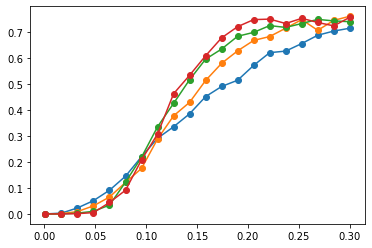

In [503]:
plt.plot(px_list,fail_prob.T/Nrep,"o-")
plt.show()

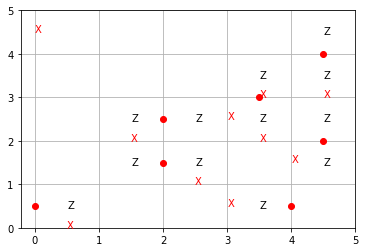

array([[1., 0.]])

In [482]:
l = 2 # number of sublattice points (2 for toric code) or primal/dual
r = 5 # number of columns
c = 5 # number of rows

Λ = np.kron([[0,1],[1,0]],np.eye(l*r*c))
# star stabilzers
Sx = np.zeros((r*c,l*r*c))
for row in range(r):
    for col in range(c):
        Sx[row*c + col, 2*(row*c+col)+1] = 1
        Sx[row*c + col, 2*(((row+1)%r)*c+((col-1)%c))] = 1
        Sx[row*c + col, 2*(((row+1)%r)*c+col)] = 1
        Sx[row*c + col, 2*(((row+1)%r)*c+col)+1] = 1
Sx = np.concatenate((Sx,np.zeros((r*c,l*r*c))),axis=1)


# plaquette stabilzers
Sz = np.zeros((r*c,l*r*c))
for row in range(r):
    for col in range(c):
        Sz[row*c + col, 2*(row*c+col)] = 1
        Sz[row*c + col, 2*(row*c+col)+1] = 1
        Sz[row*c + col, 2*(row*c+((col+1)%c))+1] = 1
        Sz[row*c + col, 2*(((row+1)%r)*c+col)] = 1
Sz = np.concatenate((np.zeros((r*c,l*r*c)),Sz),axis=1)
# print(Sz.T)

logicals = np.zeros((4,2*l*r*c))
## x ops
logicals[0,1:2*c+1:2] = np.ones(c) 
logicals[1,0:l*r*c:2*c] = np.ones(c) 
## z ops
logicals[2,l*r*c:(l*r*c+2*c):2] = np.ones(c) 
logicals[3,l*r*c+1:2*l*r*c:2*c] = np.ones(c)

# z flip error
pz = 0.1 # error probability
zflip = np.random.rand(l,r,c) 
zflip_inds = np.argwhere(zflip < pz)
# print(zflip)
# print(zflip_inds)
error_z = np.zeros(l*r*c)
for i in range(len(zflip_inds)):
    error_z[zflip_inds[i][0]+2*(zflip_inds[i][1]*c+zflip_inds[i][2])] = 1
# error_tot = np.reshape(np.concatenate((np.zeros(l*r*c),error_z)),[1,2*l*r*c])
# plt.figure(1)
# for i in range(len(zflip_inds)):
#     if zflip_inds[i][0] == 0 :
#         ry = zflip_inds[i][1] 
#         rx = zflip_inds[i][2] + 0.5 +0.1  
#     else:
#         ry = zflip_inds[i][1] + 0.5 +0.1
#         rx = zflip_inds[i][2]    

#     plt.text(rx,ry,"Z",color="b")


# plt.grid()

# x flip error
px = 0.1 # error probability
xflip = np.random.rand(l,r,c) 
xflip_inds = np.argwhere(xflip < px)
# print(xflip_inds)
error_x = np.zeros(l*r*c)
for i in range(len(xflip_inds)):
    error_x[xflip_inds[i][0]+2*(xflip_inds[i][1]*c+xflip_inds[i][2])] = 1

plt.figure(1)
for i in range(len(xflip_inds)):
    if xflip_inds[i][0] == 0 :
        ry = xflip_inds[i][1] 
        rx = xflip_inds[i][2] + 0.5   
    else:
        ry = xflip_inds[i][1] + 0.5
        rx = xflip_inds[i][2]    

    plt.text(rx,ry,"X",color="r")
# plt.gca().invert_yaxis()

error_tot = np.reshape(np.concatenate((error_x,0*error_z)),[1,2*l*r*c])

# find syndrome
syndrome_x = np.dot(error_tot,np.dot(Λ,Sx.T)) % 2
synd_x_inds = np.argwhere(syndrome_x > 0)
# print(synd_x_inds)
# plt.figure(1)
# for i in range(len(synd_x_inds)):
#     plt.text((synd_x_inds[i][1]%c)-0.05,int(synd_x_inds[i][1]/c)+1.05,'X')
    
syndrome_z = np.dot(error_tot,np.dot(Λ,Sz.T)) % 2
synd_z_inds = np.argwhere(syndrome_z > 0)
# print(synd_z_inds)
plt.figure(1)
for i in range(len(synd_z_inds)):
    plt.text((synd_z_inds[i][1]%c)+0.5,int(synd_z_inds[i][1]/c)+0.45,'Z')

z_graph = []
z_graph_inds = []
z_graph_paths = {}
for i1 in range(len(synd_z_inds[:,1])):
    for i2 in range(i1+1,len(synd_z_inds[:,1])):
        ind1 = synd_z_inds[i1,1]
        ind2 = synd_z_inds[i2,1]        
        z_graph_inds.append([ind1,ind2])
        y1 = int(ind1/c)
        y2 = int(ind2/c)
        dy = np.abs(y1-y2)
        x1 = ind1%c
        x2 = ind2%c
        dx = np.abs(x1-x2)        
        dy = min(dy,r-dy)
        dx = min(dx,c-dx)
        z_graph.append((i1,i2,dx+dy ))

mates = blossom5.mwpm_ids(z_graph)
rec_z = np.zeros(l*r*c)

plt.figure(1)
for links in mates:
    l_graph = synd_z_inds[np.array(links),1]

    x1 = (l_graph[0]%c) 
    y1 = int(l_graph[0]/c)
    x2 = (l_graph[1]%c) 
    y2 = int(l_graph[1]/c) 
    dx = np.abs(x1-x2)
    dy = np.abs(y1-y2)
#     print([x1,y1],[x2,y2])
    vx, vy, px, py = recovery(x1,y1,x2,y2)
#     plt.plot(vx+0.5,vy+0.5,"k--")
    plt.plot(px,py,"ro")
    
    for j in range(len(px)):
        if px[j]-int(px[j])>0:
            rec_z[2*(int(py[j])*c+int(px[j]))] = 1
        else:
            rec_z[1+2*(int(py[j])*c+int(px[j]))] = 1

rec_tot = np.reshape(np.concatenate((rec_z,np.zeros(l*r*c))),[1,2*l*r*c])

###########

plt.xticks(np.arange(0,c+1.))
plt.yticks(np.arange(0,r+1.))
plt.grid()
plt.show()

np.dot( (rec_tot + error_tot )%2 , np.dot(Λ, logicals[2:4,:].T)) % 2


# check via plotting

[1, 0] [2, 0]
[array([2.]), array([0.5])]


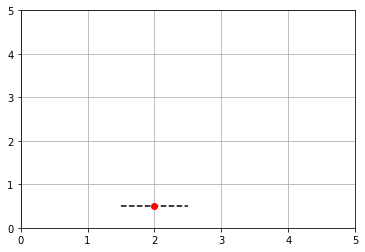

--------------
[1, 0] [3, 0]
[array([2., 3.]), array([0.5, 0.5])]


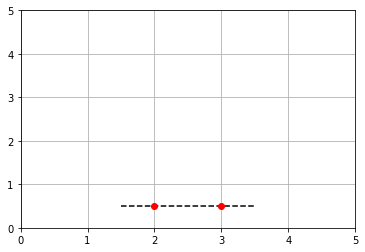

--------------
[1, 0] [4, 0]
[array([1, 0]), array([0.5, 0.5])]


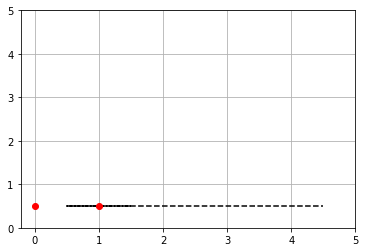

--------------
[1, 0] [2, 1]
[array([2. , 2.5]), array([0.5, 1. ])]


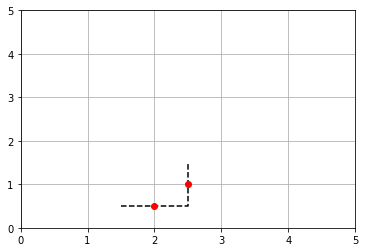

--------------
[1, 0] [0, 2]
[array([1. , 1.5, 1.5]), array([2.5, 2. , 1. ])]


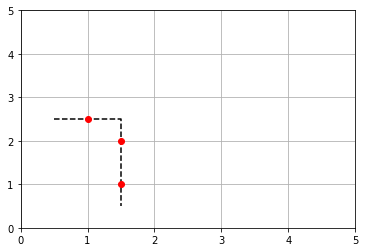

--------------
[1, 0] [3, 2]
[array([2. , 3. , 3.5, 3.5]), array([0.5, 0.5, 1. , 2. ])]


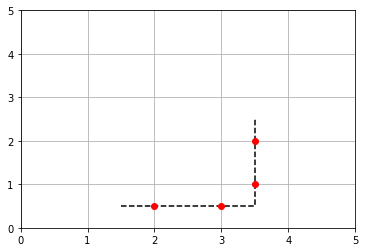

--------------
[1, 0] [1, 3]
[array([1.5, 1.5]), array([0, 4])]


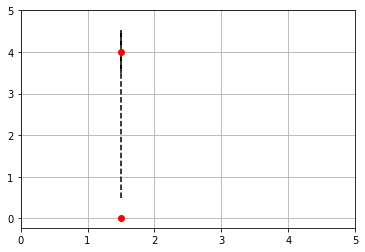

--------------
[1, 0] [4, 3]
[array([1. , 0. , 4.5, 4.5]), array([0.5, 0.5, 0. , 4. ])]


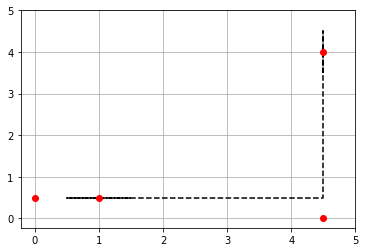

--------------
[1, 0] [1, 4]
[array([1.5]), array([0])]


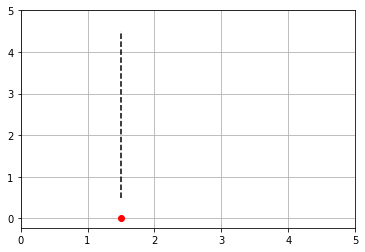

--------------
[2, 0] [3, 0]
[array([3.]), array([0.5])]


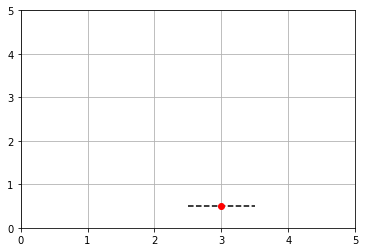

--------------
[2, 0] [4, 0]
[array([3., 4.]), array([0.5, 0.5])]


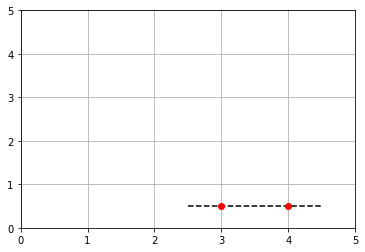

--------------
[2, 0] [2, 1]
[array([2.5]), array([1.])]


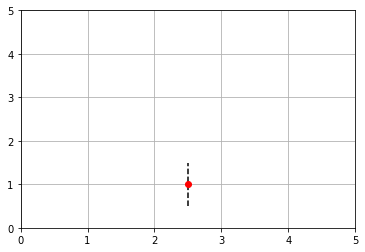

--------------
[2, 0] [0, 2]
[array([1. , 2. , 2.5, 2.5]), array([2.5, 2.5, 2. , 1. ])]


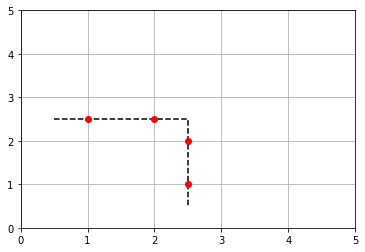

--------------
[2, 0] [3, 2]
[array([3. , 3.5, 3.5]), array([0.5, 1. , 2. ])]


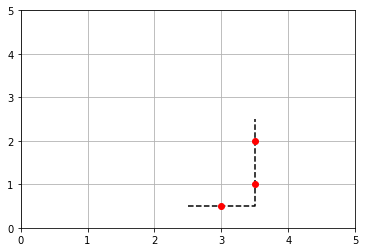

--------------
[2, 0] [1, 3]
[array([2. , 2.5, 2.5]), array([3.5, 4. , 0. ])]


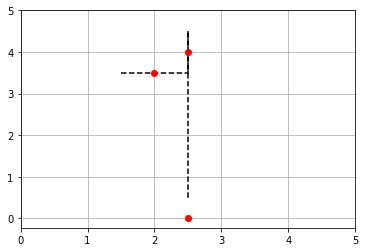

--------------
[2, 0] [4, 3]
[array([3. , 4. , 4.5, 4.5]), array([0.5, 0.5, 0. , 4. ])]


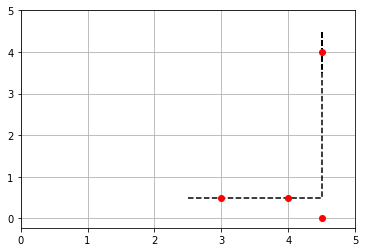

--------------
[2, 0] [1, 4]
[array([2. , 2.5]), array([4.5, 0. ])]


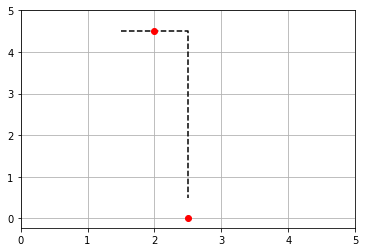

--------------
[3, 0] [4, 0]
[array([4.]), array([0.5])]


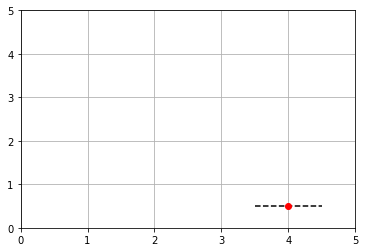

--------------
[3, 0] [2, 1]
[array([3. , 3.5]), array([1.5, 1. ])]


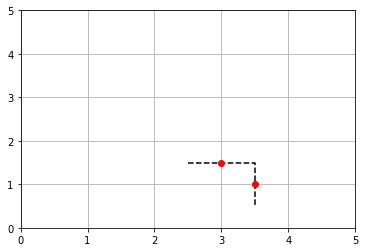

--------------
[3, 0] [0, 2]
[array([0. , 4. , 3.5, 3.5]), array([2.5, 2.5, 2. , 1. ])]


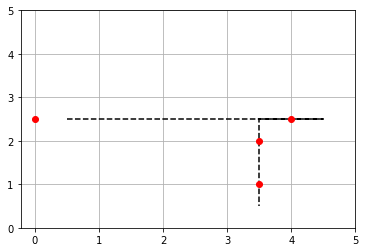

--------------
[3, 0] [3, 2]
[array([3.5, 3.5]), array([1., 2.])]


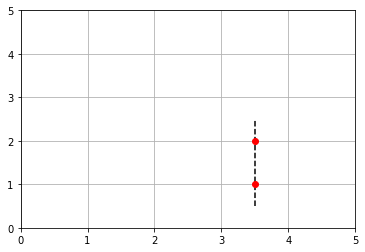

--------------
[3, 0] [1, 3]
[array([2. , 3. , 3.5, 3.5]), array([3.5, 3.5, 4. , 0. ])]


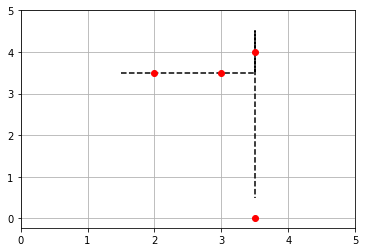

--------------
[3, 0] [4, 3]
[array([4. , 4.5, 4.5]), array([0.5, 0. , 4. ])]


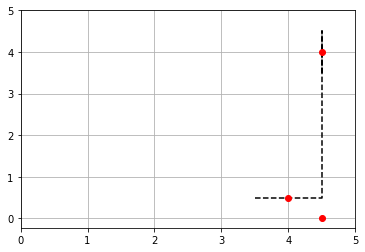

--------------
[3, 0] [1, 4]
[array([2. , 3. , 3.5]), array([4.5, 4.5, 0. ])]


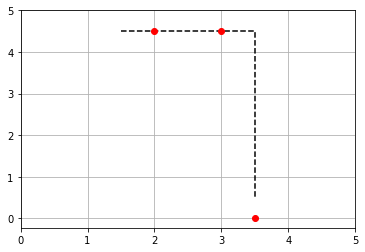

--------------
[4, 0] [2, 1]
[array([3. , 4. , 4.5]), array([1.5, 1.5, 1. ])]


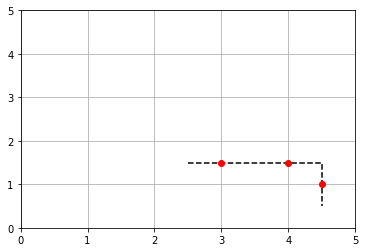

--------------
[4, 0] [0, 2]
[array([0. , 4.5, 4.5]), array([2.5, 2. , 1. ])]


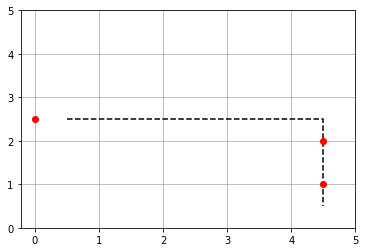

--------------
[4, 0] [3, 2]
[array([4. , 4.5, 4.5]), array([2.5, 2. , 1. ])]


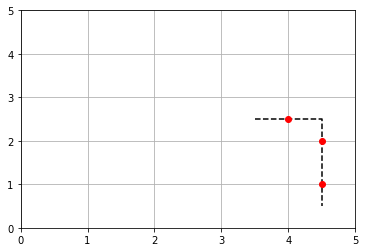

--------------
[4, 0] [1, 3]
[array([1. , 0. , 4.5, 4.5]), array([3.5, 3.5, 4. , 0. ])]


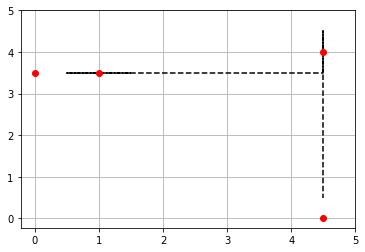

--------------
[4, 0] [4, 3]
[array([4.5, 4.5]), array([0, 4])]


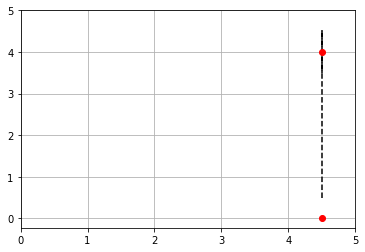

--------------
[4, 0] [1, 4]
[array([1. , 0. , 4.5]), array([4.5, 4.5, 0. ])]


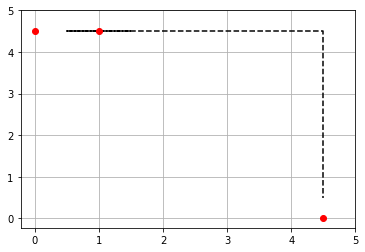

--------------
[2, 1] [0, 2]
[array([1. , 2. , 2.5]), array([2.5, 2.5, 2. ])]


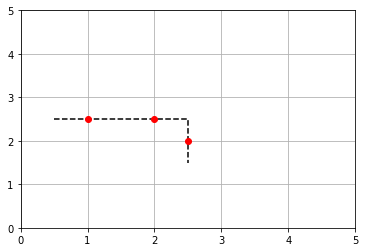

--------------
[2, 1] [3, 2]
[array([3. , 3.5]), array([1.5, 2. ])]


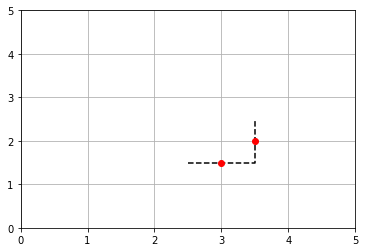

--------------
[2, 1] [1, 3]
[array([2. , 2.5, 2.5]), array([3.5, 3. , 2. ])]


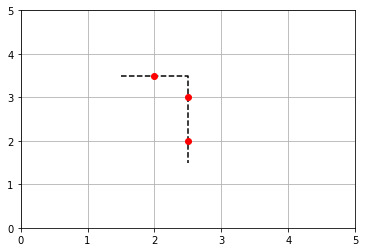

--------------
[2, 1] [4, 3]
[array([3. , 4. , 4.5, 4.5]), array([1.5, 1.5, 2. , 3. ])]


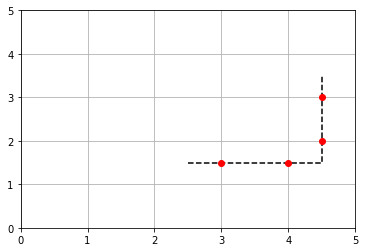

--------------
[2, 1] [1, 4]
[array([2. , 2.5, 2.5]), array([4.5, 0. , 1. ])]


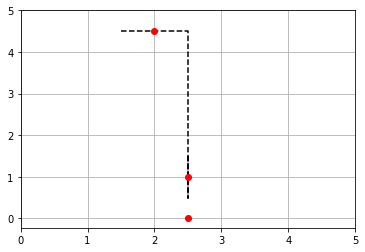

--------------
[0, 2] [3, 2]
[array([0, 4]), array([2.5, 2.5])]


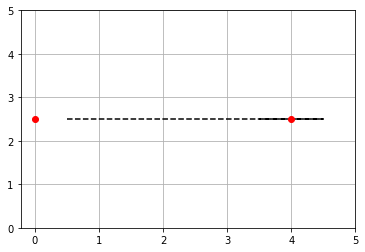

--------------
[0, 2] [1, 3]
[array([1. , 1.5]), array([2.5, 3. ])]


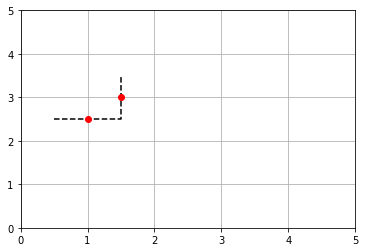

--------------
[0, 2] [4, 3]
[array([0. , 4.5]), array([2.5, 3. ])]


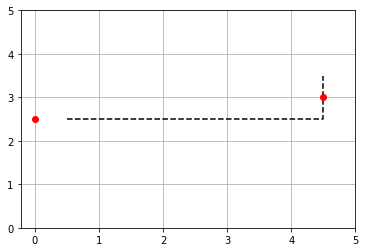

--------------
[0, 2] [1, 4]
[array([1. , 1.5, 1.5]), array([2.5, 3. , 4. ])]


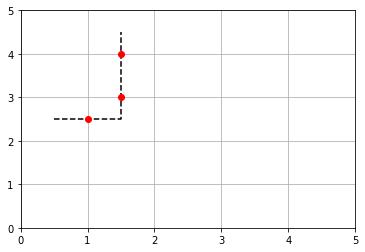

--------------
[3, 2] [1, 3]
[array([2. , 3. , 3.5]), array([3.5, 3.5, 3. ])]


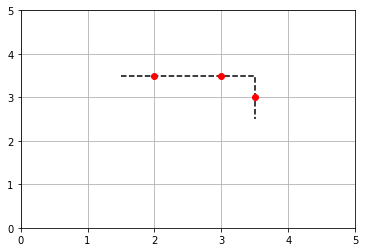

--------------
[3, 2] [4, 3]
[array([4. , 4.5]), array([2.5, 3. ])]


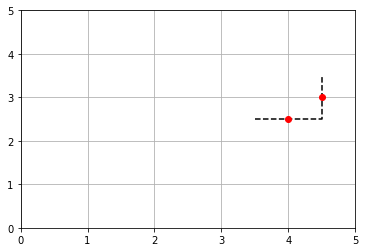

--------------
[3, 2] [1, 4]
[array([2. , 3. , 3.5, 3.5]), array([4.5, 4.5, 4. , 3. ])]


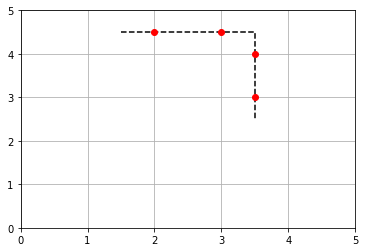

--------------
[1, 3] [4, 3]
[array([1, 0]), array([3.5, 3.5])]


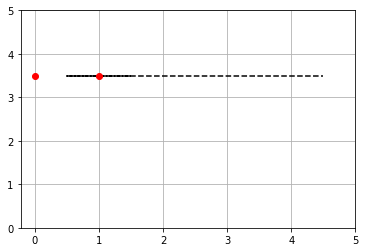

--------------
[1, 3] [1, 4]
[array([1.5]), array([4.])]


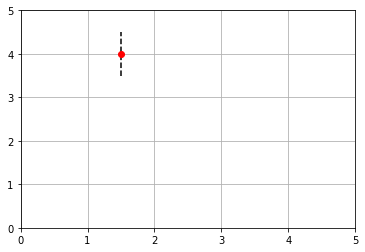

--------------
[4, 3] [1, 4]
[array([1. , 0. , 4.5]), array([4.5, 4.5, 4. ])]


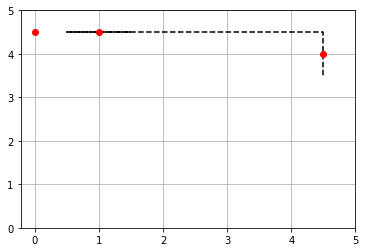

--------------


In [433]:
def plot_qubit_error(vec,text):
    for i in range(len(vec)):
        if vec[i][0] == 0 :
            ry = vec[i][1] 
            rx = vec[i][2] + 0.5   
        else:
            ry = vec[i][1] + 0.5
            rx = vec[i][2]    
        plt.text(rx,ry,text,color="g")

def recovery(x1,y1,x2,y2):
    if y2<y1:
        x1, x2 = x2, x1
        y1, y2 = y2, y1

    dx = np.abs(x1-x2)
    dy = np.abs(y1-y2)
    dl = min(dx,c-dx)+min(dy,r-dy)
    if dy > r-dy:
        if dx > c-dx:
            if x1<x2:
                v1x = np.arange(x1,x2-c-1,-1) %c 
                v1y = [y1]*len(v1x)
                p1x = np.arange(x1,x2-c,-1)%c
                p1y = [y1+0.5]*len(p1x)
                v2y = np.arange(y1-1,y2-r-1,-1) %r
                p2y = np.arange(y1,y2-r,-1)%r
            else:
                v1x = np.arange(x2,x1-c-1,-1) %c 
                v1y = [y2]*len(v1x)
                p1x = np.arange(x2,x1-c,-1)%c
                p1y = [y2+0.5]*len(p1x)                
                v2y = np.arange(y2+1,y1+r+1) %r
                p2y = np.arange(y2+1,y1+r+1)%r
            v2x = [max(x1,x2)]*len(v2y)
            p2x = [max(x1,x2)+0.5]*len(p2y)
        else:
            if x1<x2:
                v1x = np.arange(x1,x2+1)
                v1y = [y1]*len(v1x)
                p1x = np.arange(x1+1,x2+1)
                p1y = [y1+0.5]*len(p1x)
                v2y = np.arange(y1-1,y2-r-1,-1) %r
                p2y = np.arange(y1,y2-r,-1) %r
            elif x1==x2:
                v2y = np.arange(y1,y2-r-1,-1) %r
                p2y = np.arange(y1,y2-r,-1) %r
            else:
                v1x = np.arange(x2,x1+1)
                v1y = [y2]*len(v1x)
                p1x = np.arange(x2+1,x1+1)
                p1y = [y2+0.5]*len(p1x)
                v2y = np.arange(y2+1,y1+r+1) %r
                p2y = np.arange(y2+1,y1+r+1) %r
            v2x = [max(x1,x2)]*len(v2y)
            p2x = [max(x1,x2)+0.5]*len(p2y)
            
        if dx == 0:
            vx = np.array(v2x)
            vy = np.array(v2y)
            px = np.array(p2x)
            py = np.array(p2y)
        else:
            vx = np.concatenate((v1x,v2x))
            vy = np.concatenate((v1y,v2y))
            px = np.concatenate((p1x,p2x))
            py = np.concatenate((p1y,p2y))
            
    else:
        if dx > c-dx:
            if dy>0:
                if x1<x2:
                    v1x = np.arange(x1,x2-c-1,-1)%c
                    v1y = [y1]*len(v1x)
                    p1x = np.arange(x1,x2-c,-1)%c
                    p1y = [y1+0.5]*len(p1x)
                    v2y = np.arange(y1+1,y2+1)
                    p2y = np.arange(y1+1,y2+1)
                else:
                    v1x = np.arange(x2,x1-c-1,-1)%c
                    v1y = [y2]*len(v1x)
                    p1x = np.arange(x2,x1-c,-1)%c
                    p1y = [y2+0.5]*len(p1x)
                    v2y = np.arange(y2-1,y1-1,-1)
                    p2y = np.arange(y2,y1,-1)
                v2x = [max(x1,x2)]*len(v2y)
                p2x = [max(x1,x2)+0.5]*len(p2y)
                
                vx = np.concatenate((v1x,v2x))
                vy = np.concatenate((v1y,v2y))
                px = np.concatenate((p1x,p2x))
                py = np.concatenate((p1y,p2y))
            else:
                vx = np.arange(min(x1,x2),max(x1,x2)-c-1,-1)%c
                vy = np.array([y1]*len(vx))
                px = np.arange(min(x1,x2),max(x1,x2)-c,-1)%c
                py = np.array([y1+0.5]*len(px))
                
        else:
            if x1<x2:
                v1x = np.arange(x1,x2+1)
                v1y = [y1]*len(v1x)
                v2y = np.arange(y1+1,y2+1)
                v2x = [max(x1,x2)]*len(v2y)
            elif x1==x2:
                v2y = np.arange(y1,y2+1)
                v2x = [max(x1,x2)]*len(v2y)
            else:
                v1x = np.arange(x2,x1+1)
                v1y = [y2]*len(v1x)
                v2y = np.arange(y2-1,y1-1,-1)
                v2x = [max(x1,x2)]*len(v2y)
                
            if dy ==0:
                vx = np.array(v1x)
                vy = np.array(v1y)
            elif dx == 0:
                vx = np.array(v2x)
                vy = np.array(v2y)
            else:
                vx = np.concatenate((v1x,v2x))
                vy = np.concatenate((v1y,v2y))

            px = (vx[0:len(vx)-1]+vx[1:])/2 + 0.5
            py = (vy[0:len(vy)-1]+vy[1:])/2 + 0.5


#     if qubit == "qubits":
    
    return vx, vy, px, py

l = 2 # number of sublattice points (2 for toric code) or primal/dual
r = 5 # number of columns
c = 5 # number of rows

# plt.figure(1)
# for row in range(r):
#     plt.plot([row,row],[0,c],'k')
# for col in range(c):
#     plt.plot([0,r],[col,col],'k')


Λ = np.kron([[0,1],[1,0]],np.eye(l*r*c))
# star stabilzers
Sx = np.zeros((r*c,l*r*c))
for row in range(r):
    for col in range(c):
        Sx[row*c + col, 2*(row*c+col)+1] = 1
        Sx[row*c + col, 2*(((row+1)%r)*c+((col-1)%c))] = 1
        Sx[row*c + col, 2*(((row+1)%r)*c+col)] = 1
        Sx[row*c + col, 2*(((row+1)%r)*c+col)+1] = 1
Sx = np.concatenate((Sx,np.zeros((r*c,l*r*c))),axis=1)


# plaquette stabilzers
Sz = np.zeros((r*c,l*r*c))
for row in range(r):
    for col in range(c):
        Sz[row*c + col, 2*(row*c+col)] = 1
        Sz[row*c + col, 2*(row*c+col)+1] = 1
        Sz[row*c + col, 2*(row*c+((col+1)%c))+1] = 1
        Sz[row*c + col, 2*(((row+1)%r)*c+col)] = 1
Sz = np.concatenate((np.zeros((r*c,l*r*c)),Sz),axis=1)
# print(Sz.T)

# z flip error
pz = 0.1 # error probability
zflip = np.random.rand(l,r,c) 
zflip_inds = np.argwhere(zflip < pz)
# print(zflip)
# print(zflip_inds)
error_z = np.zeros(l*r*c)
for i in range(len(zflip_inds)):
    error_z[zflip_inds[i][0]+2*(zflip_inds[i][1]*c+zflip_inds[i][2])] = 1
# error_tot = np.reshape(np.concatenate((np.zeros(l*r*c),error_z)),[1,2*l*r*c])
# plt.figure(1)
# for i in range(len(zflip_inds)):
#     if zflip_inds[i][0] == 0 :
#         ry = zflip_inds[i][1] 
#         rx = zflip_inds[i][2] + 0.5 +0.1  
#     else:
#         ry = zflip_inds[i][1] + 0.5 +0.1
#         rx = zflip_inds[i][2]    

#     plt.text(rx,ry,"Z",color="b")


# plt.grid()

# x flip error
px = 0.1 # error probability
xflip = np.random.rand(l,r,c) 
xflip_inds = np.argwhere(xflip < px)
# print(xflip_inds)
error_x = np.zeros(l*r*c)
for i in range(len(xflip_inds)):
    error_x[xflip_inds[i][0]+2*(xflip_inds[i][1]*c+xflip_inds[i][2])] = 1

# plt.figure(1)
# for i in range(len(xflip_inds)):
#     if xflip_inds[i][0] == 0 :
#         ry = xflip_inds[i][1] 
#         rx = xflip_inds[i][2] + 0.5   
#     else:
#         ry = xflip_inds[i][1] + 0.5
#         rx = xflip_inds[i][2]    

#     plt.text(rx,ry,"X",color="r")
# # plt.gca().invert_yaxis()

error_tot = np.reshape(np.concatenate((error_x,error_z)),[1,2*l*r*c])

# find syndrome
syndrome_x = np.dot(error_tot,np.dot(Λ,Sx.T)) % 2
synd_x_inds = np.argwhere(syndrome_x > 0)
# print(synd_x_inds)
# plt.figure(1)
# for i in range(len(synd_x_inds)):
#     plt.text((synd_x_inds[i][1]%c)-0.05,int(synd_x_inds[i][1]/c)+1.05,'X')
    
syndrome_z = np.dot(error_tot,np.dot(Λ,Sz.T)) % 2
synd_z_inds = np.argwhere(syndrome_z > 0)
# print(synd_z_inds)
# synd_z_inds = np.array([[0,3],[0,4],[0,6]])
# print(synd_z_inds)
# plt.figure(1)
# # if len(synd_z_inds)>1:
# for i in range(len(synd_z_inds)):
#     plt.text((synd_z_inds[i][1]%c)+0.5,int(synd_z_inds[i][1]/c)+0.45,'Z')

z_graph = []
z_graph_inds = []
z_graph_paths = {}
for i1 in range(len(synd_z_inds[:,1])):
    for i2 in range(i1+1,len(synd_z_inds[:,1])):
        ind1 = synd_z_inds[i1,1]
        ind2 = synd_z_inds[i2,1]        
        z_graph_inds.append([ind1,ind2])
        y1 = int(ind1/c)
        y2 = int(ind2/c)
        dy = np.abs(y1-y2)
        x1 = ind1%c
        x2 = ind2%c
        dx = np.abs(x1-x2)
#         if dy > r-dy:
#             if dx > c-dx:
#                 v1x = (np.arange(0,c-dx+1)+ max(x1,x2))#%c
#                 v1y = [min(y1,y2)]*len(v1x)              
#                 v2y = (np.arange(1,r-dy+1)+ max(y1,y2))#%r
#                 v2x = [min(x1,x2)]*len(v2y)              
#             else:
#                 v1x = np.arange(min(x1,x2),max(x1,x2)+1)
#                 v1y = [min(y1,y2)]*len(v1x)              
#                 v2y = (np.arange(1,max(y1,y2)+1)+ r-dy)#%r
#                 v2x = [max(x1,x2)]*len(v2y)              
#         else:
#             if dx > c-dx:
#                 v1x = (np.arange(0,c-dx+1)+ max(x1,x2))#%c
#                 v1y = [min(y1,y2)]*len(v1x)
#                 v2y = np.arange(min(y1,y2)+1,max(y1,y2)+1)
#                 v2x = [min(x1,x2)]*len(v2y)              
#             else:
#                 v1x = np.arange(min(x1,x2),max(x1,x2)+1)
#                 v1y = [min(y1,y2)]*len(v1x)
#                 v2y = np.arange(min(y1,y2)+1,max(y1,y2)+1)
#                 v2x = [max(x1,x2)]*len(v2y)
# #         print(np.concatenate((v1x,v2x)))
# #         print(np.concatenate((v1y,v2y)))
#         z_graph_paths[str((i1,i2))] = [np.concatenate((v1x,v2x)),np.concatenate((v1y,v2y))]
                
        
        dy = min(dy,r-dy)
        dx = min(dx,c-dx)
#         z_graph2.append((i1,i2,(np.abs(int(ind1/c)-int(ind2/c))%r) + (np.abs(ind1-ind2)%c) ))
        z_graph.append((i1,i2,dx+dy ))
        vx, vy, px, py = recovery(x1,y1,x2,y2)
        print([x1,y1],[x2,y2])
        print([px,py])
        plt.figure(i1)
        plt.plot(vx+0.5,vy+0.5,"k--")
        plt.plot(px,py,"ro")
# #     print(vx,vy)
# #     print(px,py)
#     print("-------------")
#     vx, vy = recovery(x1,y1,x2,y2,"qubits")

    #         if dx ==0 or dy==0:
#         print(len(vx),dx+dy)
        assert (len(vx)-1) == (dx+dy)
        plt.xticks(np.arange(0,c+1.))
        plt.yticks(np.arange(0,r+1.))
        plt.grid()
        plt.show()
        print("--------------")



#         else:
#             assert (len(vx)-2) == (dx+dy)



# # print(z_graph_inds)    
# # print(z_graph)
# mates = blossom5.mwpm_ids(z_graph)
# plt.figure(1)
# for links in mates:
#     l_graph = synd_z_inds[np.array(links),1]
# #     print(synd_z_inds[mates[i],1])

#     x1 = (l_graph[0]%c) 
#     y1 = int(l_graph[0]/c)
#     x2 = (l_graph[1]%c) 
#     y2 = int(l_graph[1]/c) 
#     dx = np.abs(x1-x2)
#     dy = np.abs(y1-y2)
#     print([x1,y1],[x2,y2])
#     vx, vy, px, py = recovery(x1,y1,x2,y2)
#     plt.plot(vx+0.5,vy+0.5,"k--")
# #     print(vx,vy)
# #     print(px,py)
# #     print("-------------")
# #     vx, vy = recovery(x1,y1,x2,y2,"qubits")
#     plt.plot(px,py,"ro")
###########
#     if dy > r-dy:
#         if dx > c-dx:
#             v1x = (np.arange(0,c-dx+1)+ max(x1,x2))#%c
#             v1y = [min(y1,y2)]*len(v1x)              
#             v2y = (np.arange(1,r-dy+1)+ max(y1,y2))#%r
#             v2x = [min(x1,x2)]*len(v2y)              
# #             plt.plot(np.concatenate((v1x,v2x))+0.5,np.concatenate((v1y,v2y))+0.5,"k--")
#         else:
#             v1x = np.arange(min(x1,x2),max(x1,x2)+1)
#             v1y = [min(y1,y2)]*len(v1x)              
#             v2y = (np.arange(1,max(y1,y2)+1)+ r-dy)#%r
#             v2x = [max(x1,x2)]*len(v2y)              
# #             plt.plot(np.concatenate((v1x,v2x))+0.5,np.concatenate((v1y,v2y))+0.5,"k--")

#     else:
#         if dx > c-dx:
#             v1x = (np.arange(0,c-dx+1)+ max(x1,x2))#%c
#             v1y = [min(y1,y2)]*len(v1x)
#             v2y = np.arange(min(y1,y2)+1,max(y1,y2)+1)
#             v2x = [min(x1,x2)]*len(v2y)              
#             plt.plot(np.concatenate((v1x,v2x))+0.5,np.concatenate((v1y,v2y))+0.5,"k--")
#         else:
#             if x1<x2:
#                 v1x = np.arange(x1,x2+1)
#                 v1y = [y1]*len(v1x)
#             else:
#                 v1x = np.arange(x2,x1+1)
#                 v1y = [y2]*len(v1x)
#             v2y = np.arange(y1,y2+1)
#             v2x = [max(x1,x2)]*len(v2y)
#             plt.plot(np.concatenate((v1x,v2x))+0.5,np.concatenate((v1y,v2y))+0.5,"k--")
# #             print([np.concatenate((v1x,v2x)),np.concatenate((v1y,v2y))])
# #             if (len(v1x) + len(v2y)) > 1:
#             rec_z_inds = []
#             if x1<x2:
#                 for ix in np.arange(x1+1,x2+1):
#                     rec_z_inds.append([1,y1,ix])
#             else:
#                 for ix in np.arange(x2+1,x1+1):
#                     rec_z_inds.append([1,y2,ix])
                    
#             x0 = max(x1,x2)
#             for iy in np.arange(y1+1,y2+1):
#                 rec_z_inds.append([0,iy,x0])
#             print(rec_z_inds)
#             plt.figure(1)
#             plot_qubit_error(rec_z_inds,"O")

#     x1 = (l_graph[0]%c) +0.5
#     y1 = int(l_graph[0]/c) +0.5
#     x2 = (l_graph[1]%c) +0.5
#     y2 = int(l_graph[1]/c) +0.5
#     plt.plot([x1,x2],[y1,y1],"r--")
#     plt.plot([x2,x2],[y1,y2],"r--")
    
#     vec = z_graph_paths[str(links)]
#     plt.plot(vec[0]+0.5,vec[1]+0.5,"k--")

# plt.xticks(np.arange(0,c+1.))
# plt.yticks(np.arange(0,r+1.))
# plt.grid()
# plt.show()



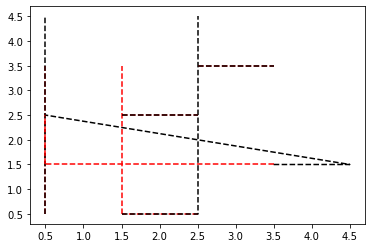

In [247]:
z_graph = []
z_graph2 = []
z_graph_inds = []
z_graph_paths = {}
for i1 in range(len(synd_z_inds[:,1])):
    for i2 in range(i1+1,len(synd_z_inds[:,1])):
        ind1 = synd_z_inds[i1,1]
        ind2 = synd_z_inds[i2,1]        
        z_graph_inds.append([ind1,ind2])
        y1 = int(ind1/c)
        y2 = int(ind2/c)
        dy = np.abs(y1-y2)
        x1 = ind1%c
        x2 = ind2%c
        dx = np.abs(x1-x2)
        if dy > r-dy:
            if dx > c-dx:
                v1x = (np.arange(0,c-dx+1)+ max(x1,x2))#%c
                v1y = [min(y1,y2)]*len(v1x)              
                v2y = (np.arange(1,r-dy+1)+ max(y1,y2))#%r
                v2x = [min(x1,x2)]*len(v2y)              
            else:
                v1x = np.arange(min(x1,x2),max(x1,x2)+1)
                v1y = [min(y1,y2)]*len(v1x)              
                v2y = (np.arange(1,max(y1,y2)+1)+ r-dy)#%r
                v2x = [max(x1,x2)]*len(v2y)              
        else:
            if dx > c-dx:
                v1x = (np.arange(0,c-dx+1)+ max(x1,x2))#%c
                v1y = [min(y1,y2)]*len(v1x)
                v2y = np.arange(min(y1,y2)+1,max(y1,y2)+1)
                v2x = [min(x1,x2)]*len(v2y)              
            else:
                v1x = np.arange(min(x1,x2),max(x1,x2)+1)
                v1y = [min(y1,y2)]*len(v1x)
                v2y = np.arange(min(y1,y2)+1,max(y1,y2)+1)
                v2x = [max(x1,x2)]*len(v2y)
#         print(np.concatenate((v1x,v2x)))
#         print(np.concatenate((v1y,v2y)))
        z_graph_paths[str((i1,i2))] = [np.concatenate((v1x,v2x)),np.concatenate((v1y,v2y))]
                
        
        dy = min(dy,r-dy)
        dx = min(dx,c-dx)
#         z_graph2.append((i1,i2,(np.abs(int(ind1/c)-int(ind2/c))%r) + (np.abs(ind1-ind2)%c) ))
        z_graph.append((i1,i2,dx+dy ))

        
# print(z_graph_inds)    
# print(z_graph)
# print(z_graph_paths[str((3,5))])
# print(z_graph2)
# mates = blossom5.mwpm_ids(z_graph)
# mates
# for links in mates:
#     print(synd_z_inds[np.array(links),1])
# #     print(synd_z_inds[mates[i],1])

mates = blossom5.mwpm_ids(z_graph)
rec_z_inds = []
plt.figure(1)
for links in mates:
    l_graph = synd_z_inds[np.array(links),1]
#     print(synd_z_inds[mates[i],1])
    
    x1 = (l_graph[0]%c) 
    y1 = int(l_graph[0]/c)
    x2 = (l_graph[1]%c) 
    y2 = int(l_graph[1]/c) 
    dx = np.abs(x1-x2)
    dy = np.abs(y1-y2)
    if dy > r-dy:
        if dx > c-dx:
            v1x = (np.arange(0,c-dx+1)+ max(x1,x2))#%c
            v1y = [min(y1,y2)]*len(v1x)              
            v2y = (np.arange(1,r-dy+1)+ max(y1,y2))#%r
            v2x = [min(x1,x2)]*len(v2y)              
        else:
            v1x = np.arange(min(x1,x2),max(x1,x2)+1)
            v1y = [min(y1,y2)]*len(v1x)              
            v2y = (np.arange(1,max(y1,y2)+1)+ r-dy)#%r
            v2x = [max(x1,x2)]*len(v2y)              
    else:
        if dx > c-dx:
            v1x = (np.arange(0,c-dx+1)+ max(x1,x2))#%c
            v1y = [min(y1,y2)]*len(v1x)
            v2y = np.arange(min(y1,y2)+1,max(y1,y2)+1)
            v2x = [min(x1,x2)]*len(v2y)              
        else:
            v1x = np.arange(min(x1,x2)+1,max(x1,x2)+1)
            y0 = min(y1,y2)+1
            for ix in np.arange(min(x1,x2),max(x1,x2)+1):
                rec_z_inds.append([1,y0,ix])
            x0 = max(x1,x2)+1
            for iy in np.arange(min(y1,y2)+1,max(y1,y2)+1):
                rec_z_inds.append([0,iy,x0])
    
    
    x1 = (l_graph[0]%c) +0.5
    y1 = int(l_graph[0]/c) +0.5
    x2 = (l_graph[1]%c) +0.5
    y2 = int(l_graph[1]/c) +0.5
    plt.plot([x1,x2],[y1,y1],"r--")
    plt.plot([x2,x2],[y1,y2],"r--")
    vec = z_graph_paths[str(links)]
    plt.plot(vec[0]+0.5,vec[1]+0.5,"k--")
    
    

In [397]:
edges = [(1, 2, 10), (1, 3, 25), (0, 2, 56), (0, 1, 15), (2, 3, 6)]
mates = blossom5.mwpm_ids(edges)
print(mates)

{(0, 1), (2, 3)}


[0] [1]
1 3


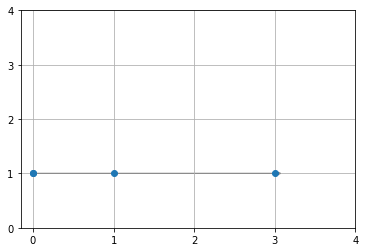

In [158]:
r = 4
c = 4
y1 = 1
x1 = 0
y2 = 1
x2 = 3

if y2<y1:
    x1, x2 = x2, x1
    y1, y2 = y2, y1
    
dx = np.abs(x1-x2)
dy = np.abs(y1-y2)
dl = min(dx,c-dx)+min(dy,r-dy)
if dy > r-dy:
    if dx > c-dx:
        if x1<x2:
            v1x = np.arange(x1,x2-c-1,-1) %c 
            v1y = [y1]*len(v1x)
            v2y = np.arange(y1+1,y2-r-1,-1) %r
        else:
            v1x = np.arange(x2,x1-c-1,-1) %c 
            v1y = [y2]*len(v1x)
            v2y = np.arange(y2+1,y1+r+1) %r
        v2x = [max(x1,x2)]*len(v2y)
    else:
        if x1<x2:
            v1x = np.arange(x1,x2+1)
            v1y = [y1]*len(v1x)
            v2y = np.arange(y1+1,y2-r-1,-1) %r
        else:
            v1x = np.arange(x2,x1+1)
            v1y = [y2]*len(v1x)
            v2y = np.arange(y2+1,y1+r+1) %r
        v2x = [max(x1,x2)]*len(v2y)
else:
    if dx > c-dx:
        v1x = np.arange(min(x1,x2)+1,max(x1,x2)-c-1,-1) %c
        v1y = [y2]*len(v1x)
        v2y = np.arange(y1,y2+1)
        v2x = [x1]*len(v2y)
    else:
        if x1<x2:
            v1x = np.arange(x1,x2+1)
            v1y = [y1]*len(v1x)
        else:
            v1x = np.arange(x2,x1+1)
            v1y = [y2]*len(v1x)
        v2y = np.arange(y1+1,y2+1)
        v2x = [max(x1,x2)]*len(v2y)
        
vx = np.concatenate((v1x,v2x))
vy = np.concatenate((v1y,v2y))
print(v2x,v2y)

plt.plot(vx,vy,"o")
print(dl,len(vx)-1)
# assert (len(vx)-2) == dl
plt.arrow(x1,y1,x2-x1,y2-y1,head_width=0.05)
plt.xticks(np.arange(0,c+1.))
plt.yticks(np.arange(0,r+1.))
plt.grid()
plt.show()

In [41]:
np.arange(2,0,)

-1

In [ ]:
import math

import pytest

from qecsim.graphtools import blossom5


def test_blossom5_available():
    available = blossom5.available()
    print(available)
    assert isinstance(available, bool)


@pytest.mark.clib
def test_blossom5_infty():
    infty = blossom5.infty()
    print(infty)
    assert isinstance(infty, int)
    assert infty > 0


@pytest.mark.clib
def test_blossom5_mwpm_ids():
    edges = [(1, 2, 10), (1, 3, 25), (0, 2, 56), (0, 1, 15), (2, 3, 6)]
    mates = blossom5.mwpm_ids(edges)
    expected = {(0, 1), (2, 3)}
    assert mates == expected


@pytest.mark.clib
def test_blossom5_mwpm_ids_no_edges():
    edges = []
    mates = blossom5.mwpm_ids(edges)
    expected = set()
    assert mates == expected


@pytest.mark.clib
def test_blossom5_mwpm_ids_negative_weights():
    edges = [(1, 2, -90), (1, 3, -75), (0, 2, -44), (0, 1, -85), (2, 3, -94)]
    mates = blossom5.mwpm_ids(edges)
    expected = {(0, 1), (2, 3)}
    assert mates == expected


@pytest.mark.clib
def test_blossom5_mwpm():
    edges = [('b', 'c', 10), ('b', 'd', 25), ('a', 'c', 56), ('a', 'b', 15), ('c', 'd', 6)]
    mates = blossom5.mwpm(edges)
    sorted_mates = {tuple(sorted(match)) for match in mates}
    expected = {('a', 'b'), ('c', 'd')}
    assert sorted_mates == expected


@pytest.mark.clib
def test_blossom5_weight_to_int_fn():
    weights = [0, 0, 0, 0, 4.394449154672438, 8.788898309344876, 10.986122886681095, 4.394449154672438,
               6.591673732008657, 2.197224577336219, 0, 0, 2.197224577336219, 6.591673732008657, 4.394449154672438, 0,
               4.394449154672438, 6.591673732008657, 2.197224577336219, 0, 0, 0, 0, 0, 2.197224577336219,
               6.591673732008657, 10.986122886681095, 4.394449154672438, 8.788898309344876, 4.394449154672438,
               2.197224577336219, 6.591673732008657, 10.986122886681095, 4.394449154672438, 8.788898309344876,
               4.394449154672438, 4.394449154672438, 6.591673732008657, 2.197224577336219, 2.197224577336219,
               6.591673732008657, 4.394449154672438, 4.394449154672438, 8.788898309344876, 10.986122886681095,
               4.394449154672438, 6.591673732008657, 2.197224577336219]
    _weight_to_int = blossom5.weight_to_int_fn(weights)
    scaled_int_weights = [_weight_to_int(wt) for wt in weights]
    assert max(scaled_int_weights) < blossom5.infty() / 10, (
        'Max absolute weight is not smaller than infty by 1 order of magnitude')
    ratio_min_to_max_weight = min(wt for wt in weights if wt != 0) / max(weights)
    ratio_min_to_max_scaled_weight = min(wt for wt in scaled_int_weights if wt != 0) / max(scaled_int_weights)
    assert math.isclose(ratio_min_to_max_weight, ratio_min_to_max_scaled_weight, rel_tol=1e-7), (
        'Ratio of min / max for non-zero weights and scaled weights is not close')


@pytest.mark.clib
def test_blossom5_weight_to_int_fn_warning_zero(caplog):
    weights = [0, 2, blossom5.infty()]
    _weight_to_int = blossom5.weight_to_int_fn(weights)
    scaled_int_weights = [_weight_to_int(wt) for wt in weights]
    print(scaled_int_weights)
    print(caplog.text)
    assert 'SCALED MINIMUM ABSOLUTE NON-ZERO WEIGHT IS ZERO' in caplog.text


@pytest.mark.clib
def test_blossom5_weight_to_int_fn_warning_less_than_3sf(caplog):
    weights = [0, 294, blossom5.infty()]
    _weight_to_int = blossom5.weight_to_int_fn(weights)
    scaled_int_weights = [_weight_to_int(wt) for wt in weights]
    print(scaled_int_weights)
    print(caplog.text)
    assert 'SCALED MINIMUM ABSOLUTE NON-ZERO WEIGHT LESS THAN 3 S.F.' in caplog.text

In [ ]:
blossom5.available()
# test_blossom5_mwpm_ids()